# Building a KNN based Machine Learning Model to predict the Total Points scored by Players in NBA Season-2013-2014

## Importing relevant libraries for our model

In [66]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Uploading our Data

In [67]:
df=pd.read_csv('nba_2013.csv')
df

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Tony Wroten,SG,20,PHI,72,16,1765,345,808,0.427,...,159,228,217,78,16,204,151,939,2013-2014,2013
477,Nick Young,SG,28,LAL,64,9,1810,387,889,0.435,...,137,166,95,46,12,95,156,1144,2013-2014,2013
478,Thaddeus Young,PF,25,PHI,79,78,2718,582,1283,0.454,...,310,476,182,167,36,165,213,1417,2013-2014,2013
479,Cody Zeller,C,21,CHA,82,3,1416,172,404,0.426,...,235,353,92,40,41,87,170,490,2013-2014,2013


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [69]:
df.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [70]:
df.isnull().values.any()

True

## Checking which feature has most missing values

<AxesSubplot:>

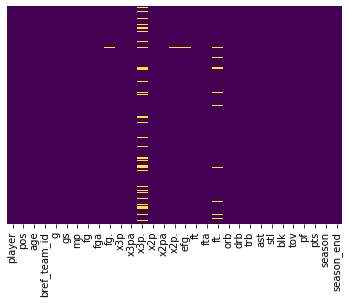

In [71]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### So 'x3p.' and 'ft.' features have most missing values among rest of the features.

C:\Users\raj_j\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x3p.'>

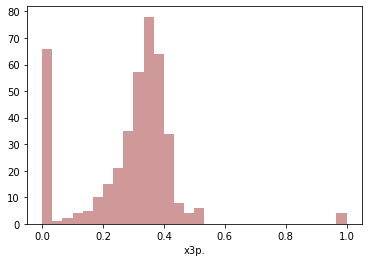

In [72]:
sns.distplot(df['x3p.'].dropna(),kde=False,color='darkred',bins=30)

<AxesSubplot:xlabel='ft.'>

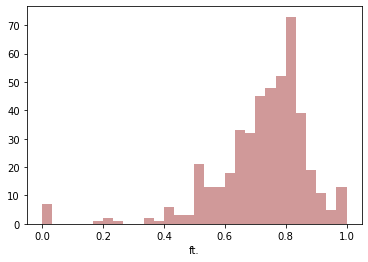

In [73]:
sns.distplot(df['ft.'].dropna(),kde=False,color='darkred',bins=30)

In [74]:
np.where(df.isnull())

(array([  1,   2,   5,  11,  18,  21,  23,  25,  26,  27,  39,  46,  48,
         54,  55,  77,  90,  90,  90,  90,  90, 102, 109, 112, 116, 120,
        134, 134, 137, 137, 139, 165, 166, 190, 190, 194, 209, 219, 243,
        245, 255, 256, 257, 260, 266, 271, 271, 289, 295, 309, 317, 321,
        324, 334, 336, 339, 340, 348, 351, 353, 356, 356, 362, 364, 379,
        386, 397, 397, 397, 397, 397, 398, 401, 407, 411, 421, 424, 427,
        431, 434, 437, 438, 442, 444, 446, 447, 456, 456, 460, 460, 461,
        461, 468, 473], dtype=int64),
 array([12, 12, 12, 12, 12, 12, 12, 12, 12, 19, 12, 12, 12, 15, 12, 12,  9,
        12, 15, 16, 19, 19, 19, 19, 12, 12, 12, 19, 12, 19, 12, 12, 19, 12,
        19, 12, 12, 19, 12, 12, 12, 12, 12, 12, 12, 12, 19, 12, 12, 12, 12,
        19, 12, 12, 12, 12, 12, 12, 12, 12, 12, 19, 12, 12, 12, 12,  9, 12,
        15, 16, 19, 12, 12, 12, 12, 12, 12, 12, 19, 12, 12, 12, 12, 12, 12,
        19, 12, 19, 12, 19, 12, 19, 19, 12], dtype=int64))

In [75]:

df['x3p.'].value_counts()

0.000000    66
0.250000     8
0.333333     8
0.200000     7
0.315789     5
            ..
0.181818     1
0.329949     1
0.327586     1
0.364000     1
0.308219     1
Name: x3p., Length: 272, dtype: int64

In [76]:
df.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

### Dropping player names,their positions ,Team IDs,season and season end from features since they do not contribute much to the points scored,whereas dropping pts from features,since it our target variable i.e.total points scored .

In [77]:
X=df.drop(['player','pos','bref_team_id','pts','season', 'season_end'],axis=1)
X_col=X.columns


In [78]:
y=df['pts']

### importing relevant sklearn liberaries for our model 

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import neighbors, datasets, preprocessing
from sklearn.preprocessing import MinMaxScaler

## Standardising our data

In [80]:
X = StandardScaler().fit_transform(X.values)

In [81]:
df1=pd.DataFrame(X,columns=X_col)
Df=pd.DataFrame(X,columns=X_col)

In [82]:
df1.isnull().values.any()

True

In [83]:
df1

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
0,-0.836776,0.385287,-0.863104,-0.435541,-0.739170,-0.769305,0.320218,-0.701011,-0.717354,-0.117151,...,-0.515944,-0.390135,0.260962,-0.129597,-0.013130,-0.645891,-0.468543,0.061474,-0.668345,0.226751
1,-1.552101,1.096851,-0.188059,-0.045058,-0.581877,-0.649891,0.675298,-0.779747,-0.830465,NaN,...,0.117140,-0.883909,1.389328,0.187214,0.566441,-0.531285,0.020702,1.066555,-0.013774,1.365358
2,0.116990,-0.010027,-0.458077,-0.308355,-0.290593,-0.405636,0.847766,-0.779747,-0.830465,NaN,...,-0.012528,-0.521392,0.744547,0.283635,0.436537,-0.569487,-0.439764,0.385694,-0.524659,0.029955
3,0.355432,0.780600,1.600813,1.466669,1.579447,1.591828,0.228912,1.739801,1.431746,0.899094,...,1.642645,0.578661,-0.383819,0.462702,0.216700,1.034996,-0.123194,-0.684232,1.183611,0.423547
4,-0.359893,0.108567,0.149464,-0.319512,-0.331373,-0.476199,1.111540,-0.779747,-0.822924,-1.810892,...,-0.409159,0.709917,0.615591,0.139004,0.291645,-0.554207,-0.468543,0.709913,-0.141496,1.140448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,-1.552101,0.741069,-0.323068,0.588640,0.886192,1.040897,-0.095733,0.007612,0.587187,-0.459503,...,1.566370,-0.508891,0.212603,-0.026289,0.046826,0.798143,1.114308,-0.262746,2.109589,0.634401
477,0.355432,0.424818,-0.559334,0.638845,1.130870,1.260727,-0.014572,1.877589,1.808781,0.638984,...,1.253641,0.641164,-0.432177,-0.177807,-0.262945,-0.133985,0.193377,-0.392434,0.369389,0.704685
478,-0.359893,1.017789,1.769574,1.651870,2.266876,2.330021,0.178186,0.991810,1.371420,0.146771,...,0.826500,-0.065120,1.776196,1.013678,1.285908,0.530729,3.675650,0.385694,1.486948,1.505927
479,-1.313660,1.136383,-0.761847,0.199273,-0.121649,-0.055537,-0.105878,-0.779747,-0.822924,-1.810892,...,0.605302,0.047386,1.002460,0.497138,0.671363,-0.156906,0.020702,0.547803,0.241668,0.901481


In [84]:
df1.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
count,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.790000e+02,4.810000e+02,4.810000e+02,4.140000e+02,...,4.810000e+02,4.610000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02
mean,2.612833e-16,1.394126e-16,4.800964e-17,-4.852898e-17,7.518818e-17,-4.085436e-17,-1.307235e-16,-5.216433e-17,-1.938851e-17,-3.968913e-17,...,-2.667002e-18,3.566230e-16,-7.039876e-17,8.494014e-17,1.171389e-16,4.200844e-17,-2.400482e-17,2.839032e-17,8.032383e-17,-1.915769e-17
std,1.001041e+00,1.001041e+00,1.001041e+00,1.001041e+00,1.001041e+00,1.001041e+00,1.001045e+00,1.001041e+00,1.001041e+00,1.001210e+00,...,1.001041e+00,1.001086e+00,1.001041e+00,1.001041e+00,1.001041e+00,1.001041e+00,1.001041e+00,1.001041e+00,1.001041e+00,1.001041e+00
min,-1.790543e+00,-2.065657e+00,-8.631043e-01,-1.379395e+00,-1.123664e+00,-1.151971e+00,-4.427711e+00,-7.797473e-01,-8.304648e-01,-1.810892e+00,...,-9.202029e-01,-4.515332e+00,-8.996432e-01,-1.121353e+00,-1.092330e+00,-8.598224e-01,-1.130463e+00,-7.814979e-01,-1.147299e+00,-1.488188e+00
25%,-8.367763e-01,-8.401852e-01,-8.631043e-01,-9.476318e-01,-8.498574e-01,-8.534372e-01,-3.645794e-01,-7.797473e-01,-8.078427e-01,-3.223767e-01,...,-7.523974e-01,-4.276370e-01,-7.062091e-01,-8.252036e-01,-8.175338e-01,-7.070145e-01,-8.714509e-01,-6.518100e-01,-8.120314e-01,-8.696852e-01
50%,-1.214515e-01,3.062242e-01,-5.255814e-01,-1.075354e-01,-2.731161e-01,-2.509412e-01,1.586371e-02,-4.648037e-01,-4.685111e-01,2.913146e-01,...,-3.633936e-01,1.786419e-01,-3.354602e-01,-1.915815e-01,-2.529519e-01,-3.631967e-01,-2.095311e-01,-3.275901e-01,-2.213213e-01,-2.627262e-02
75%,5.938732e-01,8.991945e-01,9.595194e-01,8.686723e-01,6.648167e-01,6.718003e-01,4.368874e-01,5.587630e-01,6.248905e-01,5.709315e-01,...,4.451239e-01,6.161628e-01,2.770814e-01,4.627022e-01,4.565226e-01,3.015176e-01,5.962842e-01,2.560056e-01,5.769356e-01,7.327987e-01
max,2.978289e+00,1.175914e+00,1.904584e+00,2.102599e+00,3.822330e+00,3.429169e+00,5.717437e+00,4.357770e+00,3.807066e+00,4.540638e+00,...,5.219954e+00,1.734966e+00,6.192944e+00,4.271322e+00,4.473547e+00,4.648902e+00,4.366349e+00,6.318917e+00,3.562416e+00,2.349339e+00


## Replacing the missing values in features by their means

In [85]:
df1=df1.fillna(df1.mean())
df1.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
count,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,...,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02
mean,2.612833e-16,1.394126e-16,4.800964e-17,-4.852898e-17,7.518818e-17,-4.085436e-17,-1.301800e-16,-5.216433e-17,-1.938851e-17,-3.416071e-17,...,-2.667002e-18,3.454877e-16,-7.039876e-17,8.494014e-17,1.171389e-16,4.200844e-17,-2.400482e-17,2.839032e-17,8.032383e-17,-1.915769e-17
std,1.001041e+00,1.001041e+00,1.001041e+00,1.001041e+00,1.001041e+00,1.001041e+00,9.989578e-01,1.001041e+00,1.001041e+00,9.287088e-01,...,1.001041e+00,9.800085e-01,1.001041e+00,1.001041e+00,1.001041e+00,1.001041e+00,1.001041e+00,1.001041e+00,1.001041e+00,1.001041e+00
min,-1.790543e+00,-2.065657e+00,-8.631043e-01,-1.379395e+00,-1.123664e+00,-1.151971e+00,-4.427711e+00,-7.797473e-01,-8.304648e-01,-1.810892e+00,...,-9.202029e-01,-4.515332e+00,-8.996432e-01,-1.121353e+00,-1.092330e+00,-8.598224e-01,-1.130463e+00,-7.814979e-01,-1.147299e+00,-1.488188e+00
25%,-8.367763e-01,-8.401852e-01,-8.631043e-01,-9.476318e-01,-8.498574e-01,-8.534372e-01,-3.595068e-01,-7.797473e-01,-8.078427e-01,-1.428137e-01,...,-7.523974e-01,-4.088861e-01,-7.062091e-01,-8.252036e-01,-8.175338e-01,-7.070145e-01,-8.714509e-01,-6.518100e-01,-8.120314e-01,-8.696852e-01
50%,-1.214515e-01,3.062242e-01,-5.255814e-01,-1.075354e-01,-2.731161e-01,-2.509412e-01,5.718560e-03,-4.648037e-01,-4.685111e-01,1.873419e-01,...,-3.633936e-01,1.723916e-01,-3.354602e-01,-1.915815e-01,-2.529519e-01,-3.631967e-01,-2.095311e-01,-3.275901e-01,-2.213213e-01,-2.627262e-02
75%,5.938732e-01,8.991945e-01,9.595194e-01,8.686723e-01,6.648167e-01,6.718003e-01,4.318148e-01,5.587630e-01,6.248905e-01,5.166871e-01,...,4.451239e-01,5.849114e-01,2.770814e-01,4.627022e-01,4.565226e-01,3.015176e-01,5.962842e-01,2.560056e-01,5.769356e-01,7.327987e-01
max,2.978289e+00,1.175914e+00,1.904584e+00,2.102599e+00,3.822330e+00,3.429169e+00,5.717437e+00,4.357770e+00,3.807066e+00,4.540638e+00,...,5.219954e+00,1.734966e+00,6.192944e+00,4.271322e+00,4.473547e+00,4.648902e+00,4.366349e+00,6.318917e+00,3.562416e+00,2.349339e+00


In [86]:
X_train,X_test,y_train,y_test=train_test_split(df1,y,train_size=0.8,random_state=42)


## Divided our dataset into 80% as training and 20% as test.

In [87]:
y_test

73      587
415      89
392     350
278    1417
400    1071
       ... 
238     100
409     159
25      112
265    1257
132     929
Name: pts, Length: 97, dtype: int64

In [88]:
from sklearn.preprocessing import MinMaxScaler
pd.DataFrame(MinMaxScaler().fit_transform(df.drop(['player','pos','bref_team_id','pts','season', 'season_end'],axis=1).values),columns=X_col)

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
0,0.20,0.756098,0.000000,0.271067,0.077739,0.083531,0.468,0.015326,0.024390,0.266667,...,0.065839,0.660,0.163636,0.183908,0.193896,0.038835,0.120419,0.118721,0.101695,0.446886
1,0.05,0.975610,0.243902,0.383211,0.109541,0.109597,0.503,0.000000,0.000000,NaN,...,0.168944,0.581,0.322727,0.242656,0.298025,0.059639,0.209424,0.260274,0.240678,0.743590
2,0.40,0.634146,0.146341,0.307594,0.168433,0.162915,0.520,0.000000,0.000000,NaN,...,0.147826,0.639,0.231818,0.260536,0.274686,0.052705,0.125654,0.164384,0.132203,0.395604
3,0.45,0.878049,0.890244,0.817366,0.546525,0.598934,0.459,0.490421,0.487805,0.426667,...,0.417391,0.815,0.072727,0.293742,0.235189,0.343967,0.183246,0.013699,0.494915,0.498168
4,0.30,0.670732,0.365854,0.304390,0.160188,0.147512,0.546,0.000000,0.001626,0.000000,...,0.083230,0.836,0.213636,0.233716,0.248654,0.055479,0.120419,0.210046,0.213559,0.684982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,0.05,0.865854,0.195122,0.565203,0.406360,0.478673,0.427,0.153257,0.305691,0.212766,...,0.404969,0.641,0.156818,0.203065,0.204668,0.300971,0.408377,0.073059,0.691525,0.553114
477,0.45,0.768293,0.109756,0.579622,0.455830,0.526659,0.435,0.517241,0.569106,0.385714,...,0.354037,0.825,0.065909,0.174968,0.149013,0.131761,0.240838,0.054795,0.322034,0.571429
478,0.30,0.951220,0.951220,0.870554,0.685512,0.760071,0.454,0.344828,0.474797,0.308219,...,0.284472,0.712,0.377273,0.395913,0.427289,0.252427,0.874346,0.164384,0.559322,0.780220
479,0.10,0.987805,0.036585,0.453380,0.202591,0.239336,0.426,0.000000,0.001626,0.000000,...,0.248447,0.730,0.268182,0.300128,0.316876,0.127601,0.209424,0.187215,0.294915,0.622711


In [89]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Creating our KNN Regression Model

In [90]:
knn=KNeighborsRegressor(n_neighbors=1)


## Initially I have run the model using nearest neighbor = 1 

In [91]:
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [92]:
MSE=mean_squared_error(y_test, y_pred)
RMSE=sqrt(MSE)
MAE=mean_absolute_error(y_test, y_pred)
R2=r2_score(y_test, y_pred)

print("Mean Squared Error = ",MSE)
print("\nRoot Mean Squared Error = ",RMSE)
print("\nMean Absolute Error = ",MAE)
print("\nR-squared score = ", R2 )


Mean Squared Error =  9817.927835051547

Root Mean Squared Error =  99.0854572328934

Mean Absolute Error =  69.16494845360825

R-squared score =  0.9434447609133224


## Code to find the optimal K value for our model:

In [93]:
RMSE = []
for K in range(100):
    K = K+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(X_train, y_train)  
    y_pred=knn.predict(X_test) 
    RMSE= sqrt(mean_squared_error(y_test,y_pred)) 
    MAE= mean_absolute_error(y_test, y_pred)
    R2=r2_score(y_test, y_pred)
    #RMSE+=(RMSE) 
    print("for k= " , K , "   RMSE = ", RMSE,"     MAE = ",MAE,"      R2 = ",R2)

for k=  1    RMSE =  99.0854572328934      MAE =  69.16494845360825       R2 =  0.9434447609133224
for k=  2    RMSE =  80.25121638927826      MAE =  60.371134020618555       R2 =  0.9629015081461088
for k=  3    RMSE =  69.80174018186763      MAE =  50.1958762886598       R2 =  0.9719336777810679
for k=  4    RMSE =  67.6782630821332      MAE =  47.868556701030926       R2 =  0.9736153452486309
for k=  5    RMSE =  65.82701165872201      MAE =  46.58762886597938       R2 =  0.9750390398474674
for k=  6    RMSE =  62.89298899040037      MAE =  44.065292096219935       R2 =  0.9772145569675904
for k=  7    RMSE =  66.3523863569181      MAE =  45.02798232695139       R2 =  0.9746390159560827
for k=  8    RMSE =  64.47932443535039      MAE =  44.751288659793815       R2 =  0.9760506371249436
for k=  9    RMSE =  65.19939555787602      MAE =  46.2176403207331       R2 =  0.9755127426087122
for k=  10    RMSE =  66.79911953861382      MAE =  46.81546391752577       R2 =  0.974296368666253
f

for k=  91    RMSE =  134.79530772561395      MAE =  88.45100260564178       R2 =  0.8953347401118341
for k=  92    RMSE =  135.24189708069616      MAE =  88.98263110712685       R2 =  0.8946400598200511
for k=  93    RMSE =  136.1564802101273      MAE =  89.5636847356169       R2 =  0.8932102329976253
for k=  94    RMSE =  136.35727427303124      MAE =  90.04715946479493       R2 =  0.8928950285755454
for k=  95    RMSE =  136.7356823660529      MAE =  90.46760716223548       R2 =  0.8922997449691878
for k=  96    RMSE =  137.4438306290312      MAE =  90.8234536082474       R2 =  0.8911813062280127
for k=  97    RMSE =  138.16500097564875      MAE =  91.11510256137738       R2 =  0.8900363628805628
for k=  98    RMSE =  139.19290881397094      MAE =  91.80338733431516       R2 =  0.8883940808511148
for k=  99    RMSE =  139.92772876631122      MAE =  92.30771633864418       R2 =  0.8872126021532931
for k=  100    RMSE =  141.06854632726103      MAE =  92.94123711340205       R2 =  0.8

## At K=4,I got the RMSE,MAE and R2 Values as minimum.So I'll be using K=4 as my no.of nearest neighbors for optimal predictions


In [94]:
knn=KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)


In [95]:
MSE=mean_squared_error(y_test, y_pred)
RMSE=sqrt(MSE)
MAE=mean_absolute_error(y_test, y_pred)
R2=r2_score(y_test, y_pred)

print("Mean Squared Error = ",MSE)
print("\nRoot Mean Squared Error = ",RMSE)
print("\nMean Absolute Error = ",MAE)
print("\nR-squared score = ", R2 )

Mean Squared Error =  3955.5280641466215

Root Mean Squared Error =  62.89298899040037

Mean Absolute Error =  44.065292096219935

R-squared score =  0.9772145569675904
